In [1]:
import pandas as pd

df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})

df

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm,grade_level,exam_score
0,bachelors,1,4,10,155,8,71
1,bachelors,2,3,10,151,8,72
2,bachelors,3,4,8,160,8,78
3,masters,3,3,8,160,8,79
4,masters,3,2,6,156,8,85
5,masters,4,3,6,150,8,86
6,masters,3,2,8,164,8,92
7,phd,4,2,8,151,8,93
8,phd,5,1,10,158,8,99
9,phd,5,1,10,152,8,100


In [2]:
X = df.drop(columns=['exam_score'])

X

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm,grade_level
0,bachelors,1,4,10,155,8
1,bachelors,2,3,10,151,8
2,bachelors,3,4,8,160,8
3,masters,3,3,8,160,8
4,masters,3,2,6,156,8
5,masters,4,3,6,150,8
6,masters,3,2,8,164,8
7,phd,4,2,8,151,8
8,phd,5,1,10,158,8
9,phd,5,1,10,152,8


In [3]:
y = df['exam_score']

y

0     71
1     72
2     78
3     79
4     85
5     86
6     92
7     93
8     99
9    100
Name: exam_score, dtype: int64

In [4]:
X_num = X.drop(columns=['edu_goal'])

print(X_num)

   hours_study  hours_TV  hours_sleep  height_cm  grade_level
0            1         4           10        155            8
1            2         3           10        151            8
2            3         4            8        160            8
3            3         3            8        160            8
4            3         2            6        156            8
5            4         3            6        150            8
6            3         2            8        164            8
7            4         2            8        151            8
8            5         1           10        158            8
9            5         1           10        152            8


## Variance threshold
One of the most basic filter methods is to use a variance threshold to remove any features that have little to no variation in their values. This is because features with low variance do not contribute much information to a model. Since variance can only be calculated on numeric values, this method only works on quantitative features. 

In [7]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=1)  # 0 is default

selector.fit_transform(X_num)

array([[  1,   4,  10, 155],
       [  2,   3,  10, 151],
       [  3,   4,   8, 160],
       [  3,   3,   8, 160],
       [  3,   2,   6, 156],
       [  4,   3,   6, 150],
       [  3,   2,   8, 164],
       [  4,   2,   8, 151],
       [  5,   1,  10, 158],
       [  5,   1,  10, 152]])

 As we can see, grade_level was removed because there is no variation in its values — all students are 8th graders. Since this data is the same across the board, a student’s grade level will not be able to provide any useful predictive information about their exam score, so it makes sense to drop grade_level as a feature.

In [8]:
print(selector.get_support(indices=True))

[0 1 2 3]


In [9]:
num_cols = list(X_num.columns[selector.get_support(indices=True)])

print(num_cols)

['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']


In [10]:
X_num = X_num[num_cols]

print(X_num)

   hours_study  hours_TV  hours_sleep  height_cm
0            1         4           10        155
1            2         3           10        151
2            3         4            8        160
3            3         3            8        160
4            3         2            6        156
5            4         3            6        150
6            3         2            8        164
7            4         2            8        151
8            5         1           10        158
9            5         1           10        152


In [11]:
X = X[['edu_goal'] + num_cols]

print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm
0  bachelors            1         4           10        155
1  bachelors            2         3           10        151
2  bachelors            3         4            8        160
3    masters            3         3            8        160
4    masters            3         2            6        156
5    masters            4         3            6        150
6    masters            3         2            8        164
7        phd            4         2            8        151
8        phd            5         1           10        158
9        phd            5         1           10        152


## Pearson’s correlation
Another type of filter method involves finding the correlation between variables. In particular, the Pearson’s correlation coefficient is useful for measuring the linear relationship between two numeric, continuous variables — a coefficient close to 1 represents a positive correlation, -1 represents a negative correlation, and 0 represents no correlation. Like variance, Pearson’s correlation coefficient cannot be calculated for categorical variables. Although, there is a related point biserial correlation coefficient that can be computed when one variable is dichotomous, but we won’t focus on that here.

There are 2 main ways of using correlation for feature selection — to detect correlation between features and to detect correlation between a feature and the target variable.

Correlation between features
When two features are highly correlated with one another, then keeping just one to be used in the model will be enough because otherwise they provide duplicate information. The second variable would only be redundant and serve to contribute unnecessary noise.

To determine which variables are correlated with one another, we can use the .corr() method from pandas to find the correlation coefficient between each pair of numeric features in a DataFrame. By default, .corr() computes the Pearson’s correlation coefficient, but alternative methods can be specified using the method parameter. We can visualize the resulting correlation matrix using a heatmap:

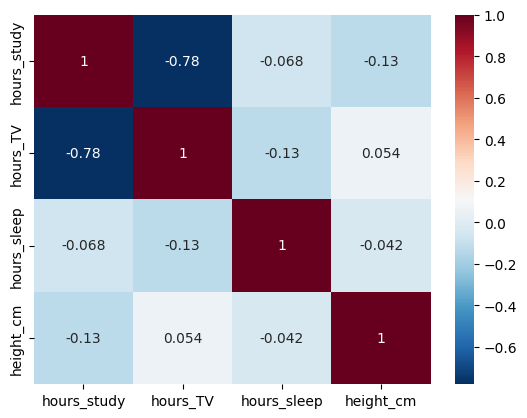

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method='pearson')  # 'pearson' is default

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [13]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

hours_TV hours_study -0.780763315142435


As seen, hours_TV appears to be highly negatively correlated with hours_study — a student who watches a lot of TV tends to spend fewer hours studying, and vice versa. Because they provide redundant information, we can choose to remove one of those variables. To decide which one, we can look at their correlation with the target variable, then remove the one that is less associated with the target. This is explored in the next section.

## Correlation between feature and target
As mentioned, the second way correlation can be used is to determine if there is a relationship between a feature and the target variable. In the case of Pearson’s correlation, this is especially useful if we intend to fit a linear model, which assumes a linear relationship between the target and predictor variables. If a feature is not very correlated with the target variable, such as having a coefficient of between -0.3 and 0.3, then it may not be very predictive and can potentially be filtered out.

We can use the same .corr() method seen previously to obtain the correlation between the target variable and the rest of the features. First, we’ll need to create a new DataFrame containing the numeric features with the exam_score column:

In [14]:
X_y = X_num.copy()
X_y['exam_score'] = y

print(X_y)

   hours_study  hours_TV  hours_sleep  height_cm  exam_score
0            1         4           10        155          71
1            2         3           10        151          72
2            3         4            8        160          78
3            3         3            8        160          79
4            3         2            6        156          85
5            4         3            6        150          86
6            3         2            8        164          92
7            4         2            8        151          93
8            5         1           10        158          99
9            5         1           10        152         100


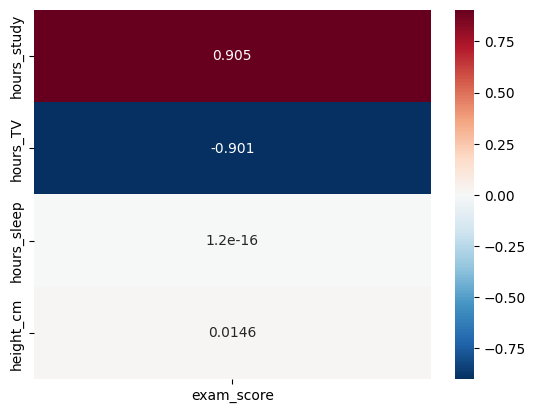

In [15]:
corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['exam_score']].drop(labels=['exam_score'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()


As seen, hours_study is positively correlated with exam_score and hours_TV is negatively correlated with it. It makes sense that hours_study and hours_TV would be negatively correlated with each other as we saw earlier, and just one of those features would suffice for predicting exam_score. Since hours_study has a stronger correlation with the target variable, let’s remove hours_TV as the redundant feature:

In [16]:
X = X.drop(columns=['hours_TV'])

print(X)

    edu_goal  hours_study  hours_sleep  height_cm
0  bachelors            1           10        155
1  bachelors            2           10        151
2  bachelors            3            8        160
3    masters            3            8        160
4    masters            3            6        156
5    masters            4            6        150
6    masters            3            8        164
7        phd            4            8        151
8        phd            5           10        158
9        phd            5           10        152
